## Projeto Final Aprendizado de Máquina

#### Duplas: Aliança BA-AL e Nemphis & Nempharey

#### Integrantes: Davi J.A. Pereira, Diogo P. de L. Carvalho, Mayllon E.P.S Silva, Samuel S. de Araújo

### Notebook 5: Modelos robustos de Regressão Linear

Vimos que o modelo RANSAC consegue lidar com o problema dos outliers com seu próprio método de especulação e regressão. Esse modelo se enquadra numa classificação de modelo robusto que engloba, além do RANSAC, mais dois modelos que, por meio de outras estratégias, fazem regressões menos sensíveis a outliers. O esperado de um modelo robusto é que ele seja capaz de se aproximar da regressão linear padrão caso os outliers fossem removidos do conjunto de dados. As diferentes estratégias aplicadas não são métodos de detecção de valores anômalos, apenas maneiras de diminuir a influência de valores que podem aumentar a diferença entre o predito e o real. Nessa seção o objetivo é explorar o comportamento de outros dois modelos robustos (Theil-Sen Regressor e Huber Regressor) frente ao dataset foco do nosso estudo. 
Antes de tudo vamos retomar rapidamente a ideia e os fundamentos matemáticos do método de mínimos quadrados, assim vamos entender porque estamos em busca de modelos lineares e vamos entender melhor o que os resultados, que serão apresentados em seguida, têm para nos dizer.

Um problema comum da matemática é: dados alguns pontos, traçar curvas que passem por eles ou próximos a eles. Com esse objetivo, existem duas vertentes de abordar esse problema: a interpolação e a aproximação. Por que fazer isso? Porque se conseguirmos funções fáceis de manipular podemos fazer até mesmo fazer previsões que podem ser úteis cientificamente, é com base nisso que são desenvolvidos muitos algoritmos de aprendizado de máquina.

O método dos mínimos quadrados consiste na maneira como se fazem ajustes lineares, capazes de de adequar, da melhor forma possível, funções a uma disposição de pontos. O objetivo é minimizar o quadrado das distâncias dos pontos em relação a reta. Para encontrar coeficientes que satisfazem os nossos interesses quando queremos entender e fazer previsões acerca do comportamento dos dados, são necessários conhecimentos estatísticos aprofundados, exploração de teoremas, estratégias de otimização e muitas outras ferramentas matemáticas avançadas. É uma verdadeira área de estudo. 

Apesar de ser extremamente bem fundamentada e ainda ser adaptada para diferentes situações, a regressão linear tradicional ainda tem limitações que exigem a definição de estratégias que fogem da adoção das medidas padronizadas relacionadas aos mínimos quadrados. É assim que contextualizamos a necessidade dos modelos robustos, que fogem das suposições fundamentais. 

__IMPORTANTE:__ Ambos os modelos apresentados serão testados em três versões: padrão, com normalização, com PCA. Além disso, seguirão uma mesma sequência lógica de apresentação:

* Instância do modelo
* Previsão
* Plot Previsto x Real
* Cálculos das métricas RMSE, MAE e R2, respectivamente.

O objetivo dos diferentes testes é avaliar o desempenho aplicando diferentes estratégias. As __conclusões__ serão apresentadas apenas no fim do notebook.

Vamos iniciar importando todas as bibliotecas necessárias para o funcionamento ideal do caderno:

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import TheilSenRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df_supercondutores = pd.DataFrame(pd.read_csv("Dataset_superconductors_2.csv"))
X = df_supercondutores.iloc[:, :-1]
y = df_supercondutores.iloc[:, -1]

Acima foi importado o dataset de supercondutores, abaixo será importado o mesmo dataset de exemplo do notebook 4, quando foi comentado sobre o modelo RANSAC.

In [3]:
exemplo = pd.read_excel("Dataset_exemplo_robusto.csv")
X2,y2 = exemplo['X'].values,exemplo['y'].values
X2 = X2.reshape(-1,1)
y2 = y2.reshape(-1,1)

Nas células seguintes ambos os datasets foram divididos em treino e teste:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.1, random_state = 42)

#### Theil-Sen Regressor

Começaremos tratando do Theil-Sen Regressor. Esse regressor é baseado no estimador Theil-Sen, que foi publicado por Henri Theil em 1950, mas foi aprimorado por Pranab Kumar Sen em 1968, daí o nome. O método se torna ainda mais interessante por envolver apenas conceitos básicos de combinação e mediana. O estimador Theil-Sen consiste em três etapas simples:

* __Primeiro passo:__ Traçar todas as possíveis retas entre todos os pares de pontos. Sempre é possível traçar uma reta entre dois pontos, essa estratégia utiliza desse fundamento matemático.
* __Segundo passo:__ Escolher a mediana $m$ das inclinações de todas as retas traçadas.
* __Terceiro passo:__ Escolher a mediana $b$ das intersecções de todas as retas traçadas.

Com isso, o modelo retorna como "a melhor reta", a reta $mx + b$.

c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


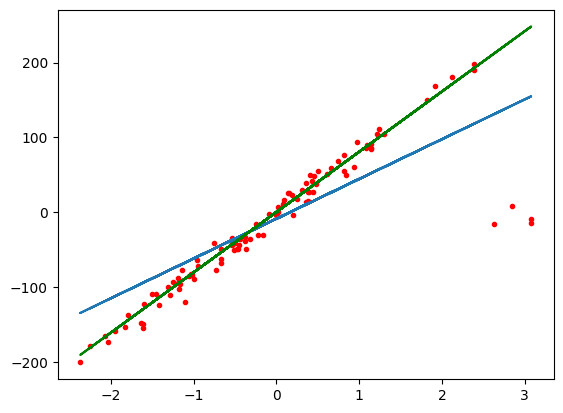

In [6]:
linear_exemplo = LinearRegression()
linear_exemplo.fit(X2_train,y2_train)
exemplo = TheilSenRegressor(random_state = 42, fit_intercept = True)
exemplo.fit(X2_train, y2_train)
plt.scatter(X2_test,y2_test, color = 'red', marker = '.')
plt.plot(X2_test, linear_exemplo.predict(X2_test))
plt.plot(X2_test,exemplo.predict(X2_test), color = 'green')

Com nosso dataset de exemplo que tem outliers claros, vemos porque esse modelo é considerado robusto e insensível aos outliers. A reta verde é o resultado do modelo Theil-Sen e a azul é a regressão linear padrão. As provas matemáticas do porquê essa estratégia é útil para ignorar outliers são densas e exigem simulações complexas, mas podemos ver que é uma forma de encontrar a melhor reta testando diferentes opções e apoiando a decisão em fundamentos estatísticos.

Vamos ver então como esse modelo se comporta frente aos nossos dados de supercondutores. É importante analisar as métricas com e sem o uso de normalização e redução de dimensionalidade. O interessante é que usar esses modelos podem nos ajudar a entender o comportamento dos dados pois podem nos mostrar se há valores que influenciam negativamente na regressão. Importante ressaltar que a principal métrica para esse caso será a MAE, pois as outras são muito sensíveis a outliers.

#### Theil-Sen padrão

In [8]:
modeloTheilSen = TheilSenRegressor(random_state = 42, fit_intercept=True)
modeloTheilSen.fit(X_train,y_train)

TheilSenRegressor(random_state=42)

In [9]:
y_previsto_theilsen = modeloTheilSen.predict(X_test)

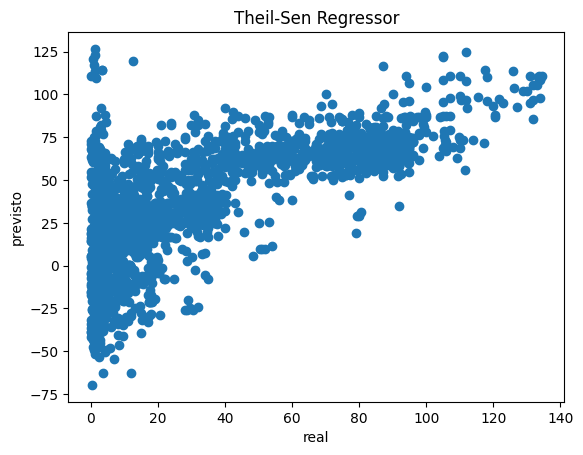

In [10]:
plt.scatter(y_test, y_previsto_theilsen)
plt.xlabel("real")
plt.ylabel("previsto")
plt.title("Theil-Sen Regressor")
plt.show()

##### Calculando as métricas:

In [11]:
RMSE = mean_squared_error(y_test, y_previsto_theilsen, squared=False)
print(f"O RMSE do modelo Theil-Sen sem normalização foi {RMSE} unidades de y.")
print("")

MAE = mean_absolute_error(y_test, y_previsto_theilsen)
print(f"O MAE do modelo sem normalização foi de {MAE} unidades de y")
print("")

R2 = r2_score(y_test, y_previsto_theilsen)
print(f"O R2 do modelo sem normalização foi de {R2} unidades de y")

O RMSE do modelo Theil-Sen sem normalização foi 26.26658309913866 unidades de y.

O MAE do modelo sem normalização foi de 20.46904380077044 unidades de y

O R2 do modelo sem normalização foi de 0.39838301919543295 unidades de y


#### Theil-Sen com normalização

In [12]:
modeloTheilSenNormalizado = make_pipeline(StandardScaler(), TheilSenRegressor(random_state = 42))
modeloTheilSenNormalizado.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('theilsenregressor', TheilSenRegressor(random_state=42))])

In [13]:
y_previsto_theilsen_normalizado = modeloTheilSenNormalizado.predict(X_test)

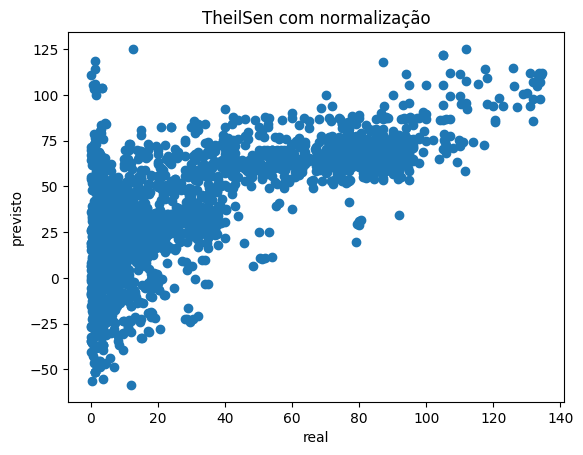

In [14]:
plt.scatter(y_test, y_previsto_theilsen_normalizado)
plt.xlabel("real")
plt.ylabel("previsto")
plt.title("TheilSen com normalização")
plt.show()

##### Calculando as métricas:

In [15]:
RMSE = mean_squared_error(y_test, y_previsto_theilsen_normalizado, squared=False)
print(f"O RMSE do modelo Theil-Sen com normalização foi {RMSE} unidades de y.")
print("")

MAE = mean_absolute_error(y_test, y_previsto_theilsen_normalizado)
print(f"O MAE do modelo com normalização foi de {MAE} unidades de y")
print("")

R2 = r2_score(y_test, y_previsto_theilsen_normalizado)
print(f"O R2 do modelo com normalização foi de {R2} unidades de y")

O RMSE do modelo Theil-Sen com normalização foi 25.952914833368393 unidades de y.

O MAE do modelo com normalização foi de 20.37329678813462 unidades de y

O R2 do modelo com normalização foi de 0.4126659127137031 unidades de y


#### Theil-Sen com PCA

In [16]:
modeloTheilSenPCA = make_pipeline(PCA(8), TheilSenRegressor(random_state = 42))
modeloTheilSenPCA.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('theilsenregressor', TheilSenRegressor(random_state=42))])

In [17]:
y_previsto_theilsen_PCA = modeloTheilSenPCA.predict(X_test)

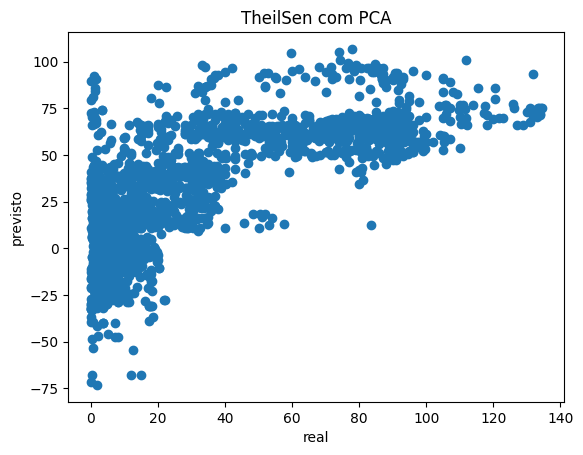

In [18]:
plt.scatter(y_test, y_previsto_theilsen_PCA)
plt.xlabel("real")
plt.ylabel("previsto")
plt.title("TheilSen com PCA")
plt.show()

#### Calculando as métricas:

In [19]:
RMSE = mean_squared_error(y_test, y_previsto_theilsen_PCA, squared=False)
print(f"O RMSE do modelo Theil-Sen com PCA foi {RMSE} unidades de y.")
print("")

MAE = mean_absolute_error(y_test, y_previsto_theilsen_PCA)
print(f"O MAE do modelo com PCA foi de {MAE} unidades de y")
print("")

R2 = r2_score(y_test, y_previsto_theilsen_PCA)
print(f"O R2 do modelo com PCA foi de {R2} unidades de y")

O RMSE do modelo Theil-Sen com PCA foi 23.89981305351387 unidades de y.

O MAE do modelo com PCA foi de 18.911848357206505 unidades de y

O R2 do modelo com PCA foi de 0.5019167564924017 unidades de y


### HuberRegressor

Quando falamos que há certos pressupostos que tornam a regressão linear ineficiente para muitos casos, signifca que os pressupostos exigem certos critérios que, apesar de não serem obrigatórios, ajudam no bom desempenho do modelo:

* __Linearidade:__ É pressuposta uma relação linear entre a variável dependente e as independentes.
* __Independência dos Resíduos:__ As diferenças entre os valores observados e os valores previstos não devem exibir padrões sistemáticos, e não devem ser dependentes umas das outras.
* __Homocedasticidade:__ A variância dos resíduos é constante em todas as faixas dos valores previstos.
* __Normalidade dos Resíduos:__ Embora a regressão linear em si não exija que os dados originais sejam normalmente distribuídos, a normalidade dos resíduos é importante para inferências estatísticas (como intervalos de confiança e testes de hipóteses) baseadas na distribuição normal.

Foi tentando contornar esse problema que Peter Jost Huber descreveu um novo estimador robusto cuja loss function: 
$$\mathscr{H}(z) = \begin{cases}
z^2, \ \ \ |z| \leq 1\\
2|z|-1, \ \ \ |z|\geq 1
\end{cases}$$

Parece complicado, mas é fácil ver que essa função é quadrática para valores pequenos de $z$ e linear para valores maiores de $z$. O critério que Huber propôs foi:

$$\sum_{i=1}^n \mathscr{H}_ {\varepsilon}\left(\frac{y_i - b - x'_i \cdot m}{\sigma}\right)$$

Em que:

$$\mathscr{H}_ {\varepsilon}(z) = \varepsilon^2\mathscr{H}(z/\varepsilon) = \begin{cases}
z^2, \ \ \ |z| \leq \varepsilon\\
2\varepsilon|z|-\varepsilon^2, \ \ \ |z|\geq \varepsilon
\end{cases}$$

Lembrando que a reta buscada é $mx + b$. $\sigma > 0 $ é um parâmetro de escala da distribuição.

Escrever dessa forma torna possível a definição de um parâmetro ajustável que será fundamental na utilização do nosso modelo, o $\varepsilon$. Pense nesse valor como um "ajuste de robustez", que você pode manipular para aproximar de uma regressão de mínimos quadrados (se fizer $\varepsilon$ muito grande) ou para um resultado semelhante ao do modelo Lasso (se $\varepsilon$ for pequeno). Em seu trabalho, Huber buscou formas de otimizar esse parâmetro, definindo que $\varepsilon = 1.35$ garante o máximo de robustez mantendo 95% de eficiência estatística para dados que seguem distribuição normal. Para erros menores que $\varepsilon \sigma$ o critério é quadrático, enquanto para os maiores ele é linear. No scikit, por padrão o valor de epsilon é $1.35$. 


Vamos ver como o Huber se comporta com nosso dataset de exemplo:

c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


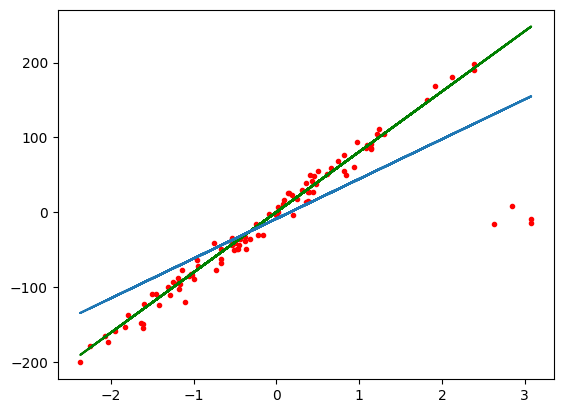

In [46]:
exemplo2 = HuberRegressor(epsilon = 1.35)
exemplo2.fit(X2_train, y2_train)
plt.scatter(X2_test,y2_test, color = 'red', marker = '.')
plt.plot(X2_test,exemplo.predict(X2_test), color = 'green')
prev2 = exemplo2.predict(X2_test)
plt.plot(X2_test, linear_exemplo.predict(X2_test))

Ele claramente lida bem com os outliers, assim como o Theil-Sen e o RANSAC. Vamos analisar o comportamento com nosso dataset:

### HuberRegressor padrão

In [21]:
modeloHuber = HuberRegressor(epsilon = 1.35)
modeloHuber.fit(X_train, y_train)

c:\venv\ilumpy\lib\site-packages\sklearn\linear_model\_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()

In [22]:
y_previsto_Huber = modeloHuber.predict(X_test)

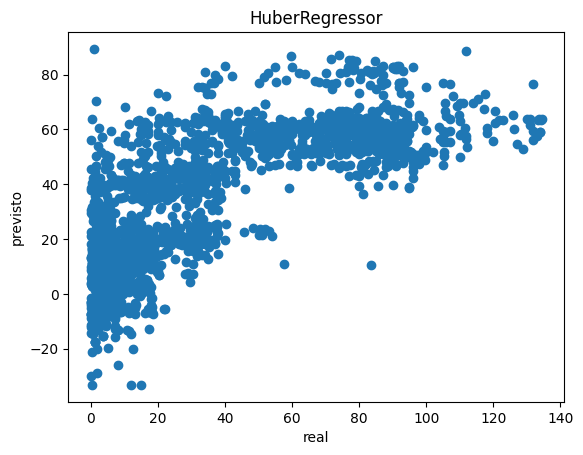

In [23]:
plt.scatter(y_test, y_previsto_Huber)
plt.xlabel("real")
plt.ylabel("previsto")
plt.title("HuberRegressor")
plt.show()

##### Calculando as métricas:

In [24]:
RMSE = mean_squared_error(y_test, y_previsto_Huber, squared=False)
print(f"O RMSE do modelo HuberRegressor foi {RMSE} unidades de y.")
print("")

MAE = mean_absolute_error(y_test, y_previsto_Huber)
print(f"O MAE do modelo foi de {MAE} unidades de y")
print("")

R2 = r2_score(y_test, y_previsto_Huber)
print(f"O R2 do modelo foi de {R2} unidades de y")

O RMSE do modelo HuberRegressor foi 21.756790803878452 unidades de y.

O MAE do modelo foi de 16.675314035648142 unidades de y

O R2 do modelo foi de 0.587235255695524 unidades de y


### Huber com normalização:

In [25]:
modeloHuberNormalizado = make_pipeline(StandardScaler(), HuberRegressor(epsilon = 1.35))
modeloHuberNormalizado.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('huberregressor', HuberRegressor())])

In [26]:
y_previsto_Huber_normalizado = modeloHuberNormalizado.predict(X_test)

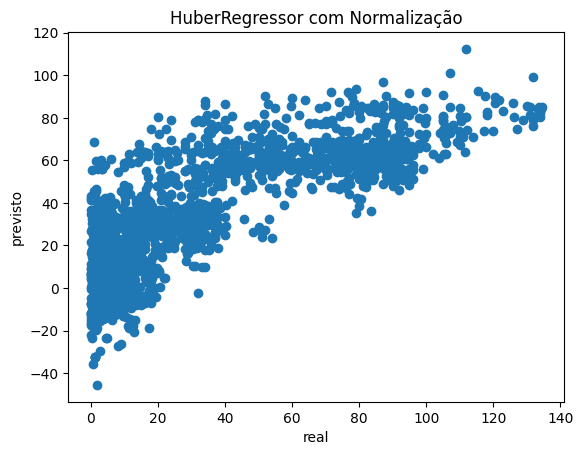

In [27]:
plt.scatter(y_test, y_previsto_Huber_normalizado)
plt.xlabel("real")
plt.ylabel("previsto")
plt.title("HuberRegressor com Normalização")
plt.show()

##### Calculando as métricas:

In [28]:
RMSE = mean_squared_error(y_test, y_previsto_Huber_normalizado, squared=False)
print(f"O RMSE do modelo HuberRegressor foi {RMSE} unidades de y.")
print("")

MAE = mean_absolute_error(y_test, y_previsto_Huber_normalizado)
print(f"O MAE do modelo foi de {MAE} unidades de y")
print("")

R2 = r2_score(y_test, y_previsto_Huber_normalizado)
print(f"O R2 do modelo foi de {R2} unidades de y")

O RMSE do modelo HuberRegressor foi 19.635145964939717 unidades de y.

O MAE do modelo foi de 15.503041143464113 unidades de y

O R2 do modelo foi de 0.6638127861827654 unidades de y


### Huber com PCA

In [29]:
modeloHuberPCA = make_pipeline(PCA(8), HuberRegressor(epsilon = 1.35))
modeloHuberPCA.fit(X_train, y_train)

c:\venv\ilumpy\lib\site-packages\sklearn\linear_model\_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('pca', PCA(n_components=8)),
                ('huberregressor', HuberRegressor())])

In [30]:
y_previsto_Huber_PCA = modeloHuberPCA.predict(X_test)

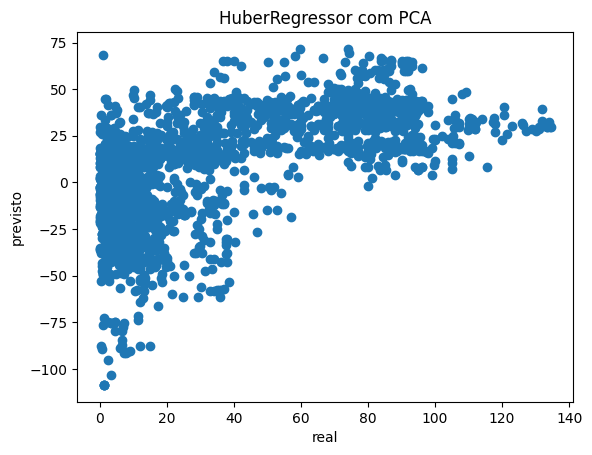

In [31]:
plt.scatter(y_test, y_previsto_Huber_PCA)
plt.xlabel("real")
plt.ylabel("previsto")
plt.title("HuberRegressor com PCA")
plt.show()

##### Calculando as métricas:

In [32]:
RMSE = mean_squared_error(y_test, y_previsto_Huber_PCA, squared=False)
print(f"O RMSE do modelo HuberRegressor com PCA foi {RMSE} unidades de y.")
print("")

MAE = mean_absolute_error(y_test, y_previsto_Huber_PCA)
print(f"O MAE do modelo com PCA foi de {MAE} unidades de y")
print("")

R2 = r2_score(y_test, y_previsto_Huber_PCA)
print(f"O R2 do modelo com PCA foi de {R2} unidades de y")

O RMSE do modelo HuberRegressor com PCA foi 39.0739216430478 unidades de y.

O MAE do modelo com PCA foi de 30.73814052375173 unidades de y

O R2 do modelo com PCA foi de -0.3313337024710268 unidades de y


### Para comparação: k-NN e Regressão Linear

#### Modelo k-NN

In [40]:
modelokNN = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
modelokNN.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [41]:
y_kNN = modelokNN.predict(X_test)

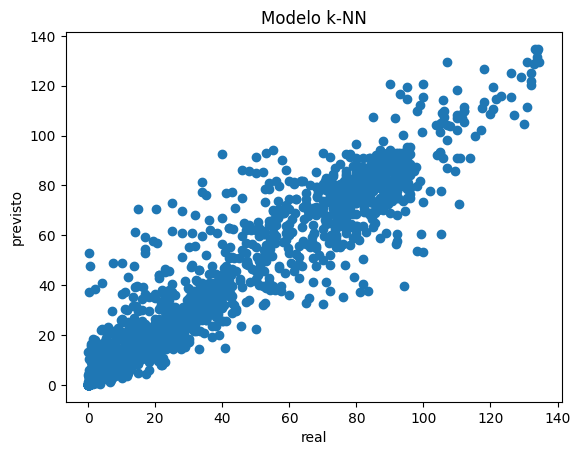

In [51]:
plt.scatter(y_test, y_kNN)
plt.xlabel("real")
plt.ylabel("previsto")
plt.title("Modelo k-NN")
plt.show()

##### Calculando as métricas:

In [44]:
RMSE = mean_squared_error(y_test, y_kNN, squared=False)
print(f"O RMSE do modelo k-NN foi {RMSE} unidades de y.")
print("")

MAE = mean_absolute_error(y_test, y_kNN)
print(f"O MAE do modelo foi de {MAE} unidades de y")
print("")

R2 = r2_score(y_test, y_kNN)
print(f"O R2 do modelo foi de {R2} unidades de y")

O RMSE do modelo k-NN foi 10.039111816364976 unidades de y.

O MAE do modelo foi de 5.839746437705689 unidades de y

O R2 do modelo foi de 0.912117276634773 unidades de y


#### Regressão Linear

In [57]:
modelo = make_pipeline(StandardScaler(), LinearRegression())
modelo.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [58]:
y_linear = modelo.predict(X_test)

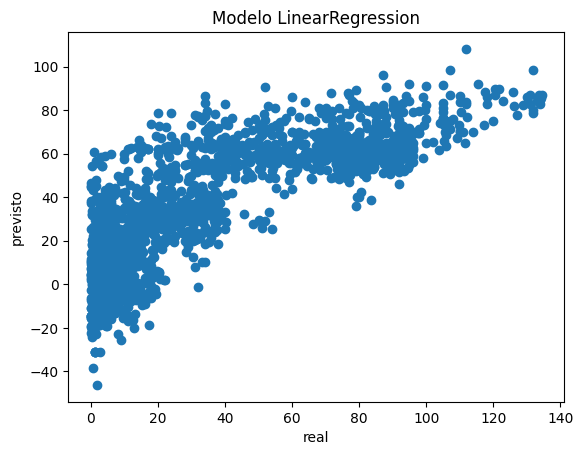

In [59]:
plt.scatter(y_test, y_linear)
plt.xlabel("real")
plt.ylabel("previsto")
plt.title("Modelo LinearRegression")
plt.show()

##### Calculando as métricas:

In [60]:
RMSE = mean_squared_error(y_test, y_baseline, squared=False)
print(f"O RMSE do modelo baseline foi {RMSE} unidades de y.")
print("")

MAE = mean_absolute_error(y_test, y_baseline)
print(f"O MAE do modelo foi de {MAE} unidades de y")
print("")

R2 = r2_score(y_test, y_baseline)
print(f"O R2 do modelo foi de {R2} unidades de y")

O RMSE do modelo baseline foi 19.608771457830244 unidades de y.

O MAE do modelo foi de 15.710193558960075 unidades de y

O R2 do modelo foi de 0.6647153327716117 unidades de y


### Conclusão

Supercondutores carregam por si mesmos uma característica fora da curva, logo, por que não ver como modelos que lidam com dados fora do esperado se comportam com esse dataset? Ao longo desse notebook foram explorados mais modelos robustos, desde sua fundamentação até a implementação. Assim como os modelos, as métricas também tem um nível característico de sensibilidade a outliers, e a MAE é a mais adequada para avaliar os modelos robustos. Assim, de nossos estudos temos:

* Nenhum modelo robusto foi capaz de superar o MAE do modelo k_NN.
* O modelo Huber com normalização padrão foi o mais eficiente dentre os modelos robustos.
* O modelo Huber com PCA foi o de pior desempenho, chegando até mesmo a um R2 negativo.
* Para dados em que haviam grupos de dados claramente desconexos dos demais pontos, o desempenho de todos os modelos robustos foi extremamente similar, e muito superior ao da regressão linear.
* O melhor modelo robusto (Huber com normalização) teve o MAE muito próximo ao da regressão linear e cerca de três vezes maior que o modelo k-NN.

### References

[1] Owen, A. B. (2006). A robust hybrid of lasso and ridge regression. Stanford University.

[2] Moura, J. M. (2013). Método alternativo para regressão trivariada em presença de outliers. Belo Horizonte: Universidade Federal de Minas Gerais, Instituto de Ciências Exatas, Departamento de Estatística.

[3] https://towardsdatascience.com/a-correlation-measure-based-on-theil-sen-regression-31b8b9ed64f1

[4] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html

[6] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html

[7] https://blogs.sas.com/content/iml/2019/05/28/theil-sen-robust-regression.html